<a href="https://colab.research.google.com/github/EstherSmila69/python-basics/blob/main/notebooks/05_Capstone_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Full Capstone Assignment — Python for Earth System & Remote Sensing**

This Capstone Assignment integrates all major skills from Notebooks **01 → 04**:

- Python fundamentals  
- Lists, loops, conditions  
- Functions & plotting  
- NumPy  
- xarray  
- NetCDF  
- Scientific interpretation  

**This assignment is designed to be completed over multiple days** and tests understanding, reasoning, coding clarity, and scientific interpretation.


---
# **Section 0 — Setup (Required)**

Run the cell below to import the scientific Python libraries you need for the assignment.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
%matplotlib inline

---
# **Section 1 — Python Fundamentals (Notebook 01)**

### **Q1.1 — Arithmetic & Variables**  
Create:
- `a = 12`
- `b = 4.7`
- `c = -3`

Compute and print:
1. `a + b`
2. `a * c`
3. `(a + b) / c`

Use f-strings to print meaningful messages.


In [ ]:
# Q1.1

a = 12
b = 4.7
c = -3

print(a + b)
print(a * c)
print((a + b) / c)



16.7
-36
-5.566666666666666


### **Q1.2 — Basic Statistics**  
Given:
```python
sst = [27.9, 28.0, 28.4, 28.6, 28.8, 29.1, 28.7, 28.3, 27.8]
```

Compute:
- Mean  
- Median  
- Minimum  
- Maximum  
- Standard deviation  

Print with clear labels.


In [ ]:
# Q1.2
import statistics as stats

sst = [27.9, 28.0, 28.4, 28.6, 28.8, 29.1, 28.7, 28.3, 27.8]

# Calculations
mean_val = stats.mean(sst)
median_val = stats.median(sst)
min_val = min(sst)
max_val = max(sst)
std_val = stats.pstdev(sst)  # population standard deviation

# Print results with clear labels
print("SST Statistics:")
print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Minimum: {min_val}")
print(f"Maximum: {max_val}")
print(f"Standard Deviation: {std_val:.2f}")




SST Statistics:
Mean: 28.40
Median: 28.40
Minimum: 27.8
Maximum: 29.1
Standard Deviation: 0.42


---
# **Section 2 — Lists, Loops, and Conditions (Notebook 02)**

### **Q2.1 — Day-wise SST Printing**  
Using the `sst` list from Q1.2, print:

```
Day 1: value
Day 2: value
...
```


In [2]:
# Q2.1

sst = [28.1, 28.3, 28.3, 27.9, 28.5, 28.7, 28.3]

for i in range(len(sst)):
    temp = sst[i]

    # print Day X: value
    print(f"Day {i+1}: {temp}")




Day 1: 28.1
Day 2: 28.3
Day 3: 28.3
Day 4: 27.9
Day 5: 28.5
Day 6: 28.7
Day 7: 28.3


### **Q2.2 — Classification**  
Classify each SST into:
- **HOT** (> 29)  
- **WARM** (28–29)  
- **NORMAL** (< 28)

Print classification for each day.  
At the end, print counts for each category.


In [3]:
# Q2.2
sst = [28.1, 28.3, 28.3, 27.9, 28.5, 28.7, 28.3]

hot = 0
warm = 0
normal = 0

for s in sst:
    if s > 29:
        hot += 1
    elif 28 < s <= 29:
        warm += 1
    else:
        normal += 1

print("Hot days:", hot)
print("Warm days:", warm)
print("Normal days:", normal)


Hot days: 0
Warm days: 6
Normal days: 1


### **Q2.3 — Rolling 3-day Mean**  
Compute a 3-day rolling mean using loops (without NumPy).  
Example output:
```
Mean Day1-3: ...
Mean Day2-4: ...
...
```


In [4]:
# Q2.3

sst = [28.1, 28.3, 28.3, 27.9, 28.5, 28.7, 28.3]

window = 3

for i in range(len(sst) - window + 1):
    total = 0
    for j in range(window):
        total += sst[i + j]
    mean = total / window
    print(f"Mean Day{i+1}-{i+window}: {mean:.2f}")


Mean Day1-3: 28.23
Mean Day2-4: 28.17
Mean Day3-5: 28.23
Mean Day4-6: 28.37
Mean Day5-7: 28.50


---
# **Section 3 — Functions, Arrays, and Plotting (Notebook 03)**

### **Q3.1 — Function: Celsius → Kelvin**  
Define:
```python
def c_to_k(T_c):
    ...
```
Test on 5 sample values.


In [ ]:
# Q3.1
# Q3.1
def c_to_k(T_c):
  return (T_c + 273.15)

print(c_to_k(0))
print(c_to_k(25))
print(c_to_k(-5))
print(c_to_k(23.5))
print(c_to_k(41))


273.15
298.15
268.15
296.65
314.15


### **Q3.2 — Function: Anomaly Computation**  
Define:
```python
def compute_anomaly(arr):
    ...
```
Return array − mean.  
Test using `sst`.


In [8]:
# Q3.2
def compute_anomaly(arr):

    # Step 1: calculate the mean of the list
    total = 0
    for x in arr:          # loop through each value
        total += x         # add each value to the total
    mean = total / len(arr)   # compute the mean

    # Step 2: compute anomalies (value - mean)
    anomalies = []
    for x in arr:              # loop again through each value
        anomalies.append(x - mean)   # store the anomaly

    return anomalies            # return the list of anomalies


# Test the function using SST
print(compute_anomaly(sst))

[-0.1999999999999993, 0.0, 0.0, -0.40000000000000213, 0.1999999999999993, 0.3999999999999986, 0.0]


### **Q3.3 — Convert to NumPy + Plot**  

1. Convert `sst` to a NumPy array  
2. Compute anomalies  
3. Create a line plot of SST  
4. Create a second plot of anomalies  
5. Include:
   - Titles  
   - Axis labels  
   - Grid  
   - A horizontal zero line for anomalies  


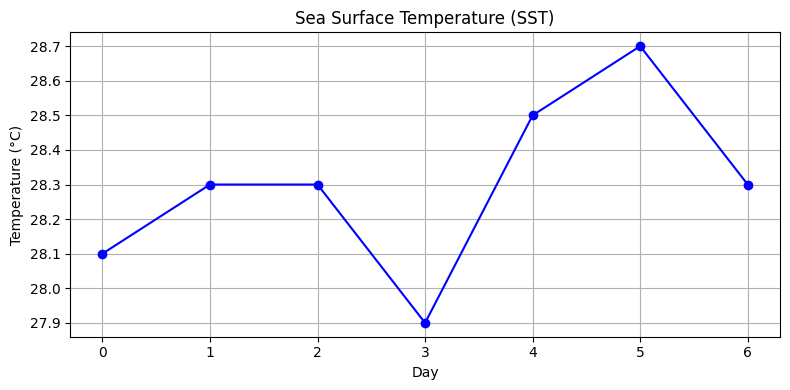

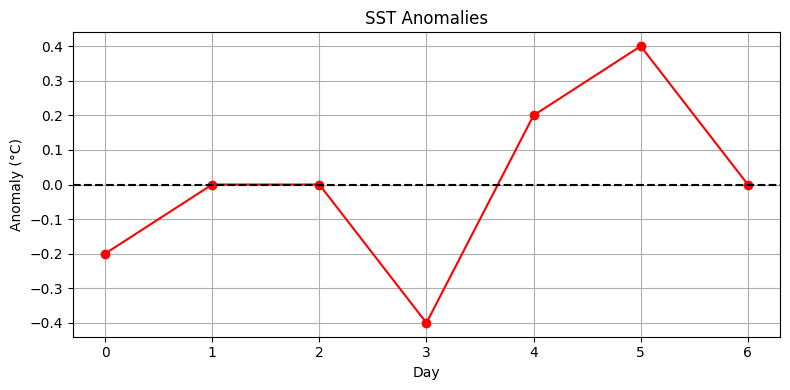

In [9]:
# Q3.3
import matplotlib.pyplot as plt
import numpy as np

# Original SST list
sst = [28.1, 28.3, 28.3, 27.9, 28.5, 28.7, 28.3]

# --- Convert to NumPy array ---
sst = np.array(sst)

# --- Compute anomalies ---
mean_sst = np.mean(sst)
anomalies = sst - mean_sst

# --- Plot SST ---
plt.figure(figsize=(8, 4))
plt.plot(sst, marker='o', linestyle='-', color='blue')
plt.title("Sea Surface Temperature (SST)")
plt.xlabel("Day")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot anomalies ---
plt.figure(figsize=(8, 4))
plt.plot(anomalies, marker='o', linestyle='-', color='red')
plt.axhline(0, color='black', linestyle='--')  # horizontal zero line
plt.title("SST Anomalies")
plt.xlabel("Day")
plt.ylabel("Anomaly (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()



---
# **Section 4 — NetCDF + xarray: Remote Sensing Dataset (Notebook 04)**

A small SST NetCDF file will be downloaded automatically.



In [13]:
import requests, os
import xarray as xr

url = "https://raw.githubusercontent.com/EarthSystem-Science-Lab/python-basics/main/data/data_sst.nc"
local = "data_sst.nc"

if not os.path.exists(local):
    r = requests.get(url)
    open(local,"wb").write(r.content)

ds = xr.open_dataset(local)
ds

<xarray.Dataset> Size: 7kB
Dimensions:  (time: 7, lat: 11, lon: 11)
Coordinates:
  * time     (time) datetime64[ns] 56B 2020-01-01 2020-01-02 ... 2020-01-07
  * lat      (lat) float64 88B 10.0 11.0 12.0 13.0 14.0 ... 17.0 18.0 19.0 20.0
  * lon      (lon) float64 88B 70.0 71.0 72.0 73.0 74.0 ... 77.0 78.0 79.0 80.0
Data variables:
    sst      (time, lat, lon) float64 7kB ...
Attributes:
    title:    Sample synthetic SST dataset for teaching
    source:   Generated in Python for teaching by Arjun's EarthSystem-Science...
    history:  Created as a small example NetCDF file for Notebook 4

### **Q4.1 — Dataset Exploration**  
Print:
- Dimensions  
- Coordinates  
- Variables  
- Global attributes  


In [14]:
# Q4.1
print("Dimensions:")
print(ds.dims)
print("\n")

print("Coordinates:")
print(ds.coords)
print("\n")

print("Variables:")
print(ds.data_vars)
print("\n")

print("Global Attributes:")
print(ds.attrs)



Dimensions:
FrozenMappingWarningOnValuesAccess({'time': 7, 'lat': 11, 'lon': 11})


Coordinates:
Coordinates:
  * time     (time) datetime64[ns] 56B 2020-01-01 2020-01-02 ... 2020-01-07
  * lat      (lat) float64 88B 10.0 11.0 12.0 13.0 14.0 ... 17.0 18.0 19.0 20.0
  * lon      (lon) float64 88B 70.0 71.0 72.0 73.0 74.0 ... 77.0 78.0 79.0 80.0


Variables:
Data variables:
    sst      (time, lat, lon) float64 7kB ...


Global Attributes:
{'title': 'Sample synthetic SST dataset for teaching', 'source': "Generated in Python for teaching by Arjun's EarthSystem-Science-Lab", 'history': 'Created as a small example NetCDF file for Notebook 4'}


### **Q4.2 — Statistics on `sst`**  
Compute and print:
- Global mean  
- Min  
- Max  


In [17]:
# Q4.2
global_mean = float(sst.mean())
global_min = float(sst.min())
global_max = float(sst.max())

print("Global mean:", global_mean)
print("Global min:", global_min)
print("Global max:", global_max)


Global mean: 27.20000000000001
Global min: 26.0
Global max: 28.4


### **Q4.3 — Time-Mean Map**  
1. Compute `sst_mean_time = ds.sst.mean(dim='time')`  
2. Plot a colour map (lat vs lon)  
3. Add labels, title, and colorbar  



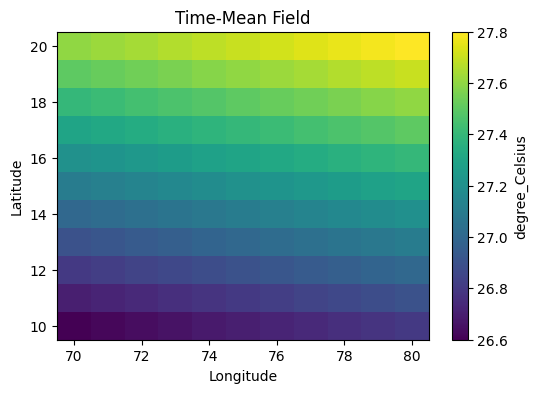

In [19]:
# Q4.3
sst_mean_time = ds.sst.mean(dim='time')

plt.figure(figsize=(6,4))
plt.pcolormesh(ds['lon'], ds['lat'], sst_mean_time, shading='auto')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Time-Mean Field')
cbar = plt.colorbar()
cbar.set_label(sst.attrs.get('units', ''))
plt.show()


### **Q4.4 — Time Series at a Point**  
Choose a latitude & longitude inside file domain.  
Extract nearest time series and plot it.

Add axis labels and title.


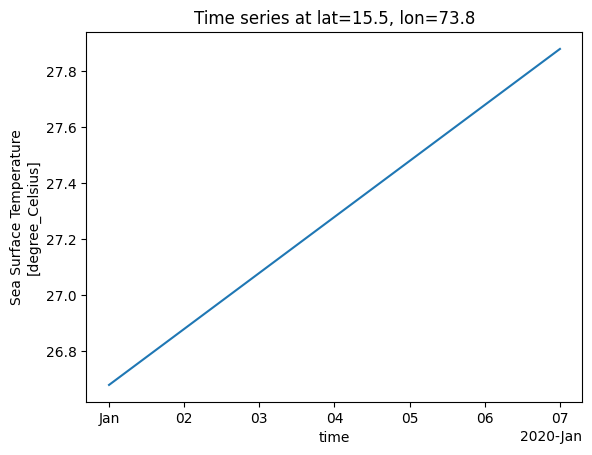

In [20]:
# Q4.4
lat_pt = 15.5
lon_pt = 73.8

ts = sst.sel(lat=lat_pt, lon=lon_pt, method='nearest')

plt.figure()
ts.plot()
plt.title(f"Time series at lat={lat_pt}, lon={lon_pt}")
plt.show()


---
# **Section 5 — Capstone Scientific Interpretation**  

Write **10–12 sentences** answering:

1. What spatial patterns do you observe in your time-mean SST map?  
2. Does the time series at your chosen point indicate warming/cooling or variability?  
3. What physical processes (mixing, stratification, insolation, currents, monsoon) could explain the patterns?  
4. How do your anomaly results relate to the NetCDF dataset behavior?  
5. How would these methods apply to real satellite (Sentinel-3/OLCI) or Argo data?

Write your answer below.


1. The time-mean field shows a clear meridional gradient in the sea surface temperature (SST), with the warmest waters (up to 27.8°C) located in the North (20° N) and the coolest waters (down to 26.6°C) in the South (10° N). This distribution indicates that the average temperature across the region is highly stratified by latitude, consistently increasing poleward.

2. The time series at the chosen point (latitude 15.5°, longitude 73.8°) clearly indicates warming. The data show a consistent and steep positive trend over the seven-day period from January 1 to January 7, 2020, during which the sea surface temperature increased steadily from approximately 26.7°C to 27.9°C.

3. Insolation (Solar Radiation):Provides the primary source of heat to the ocean surface.Higher solar radiation near the equator generally warms waters, but this effect can be overridden by other processes like mixing or currents.

Vertical Mixing:Driven by winds and turbulence, mixing transports cooler subsurface water to the surface, reducing SST.Strong mixing in the southern region (closer to 10° N) can maintain cooler waters, while weaker mixing in the north allows surface warming.

Stratification:The stability of the water column determines how heat is retained at the surface.Strong stratification (less mixing) traps heat in a shallow surface layer, while weak stratification allows heat to disperse, cooling the surface.

Currents:Ocean currents redistribute heat horizontally.In the Arabian Sea, currents influenced by the monsoon can transport warmer waters poleward or bring cooler subsurface waters to the surface via upwelling.

Monsoon Winds: Seasonal winds, especially the Southwest (Summer) Monsoon, enhance vertical mixing and drive upwelling in southern regions, cooling SST.During periods of weaker winds (pre-monsoon or inter-monsoon), reduced mixing allows rapid warming of the surface layer.

Summary of Patterns:
Meridional Gradient (North-South): Cooler in the south due to stronger mixing and upwelling; warmer in the north due to weaker mixing and persistent stratification.
Short-Term Warming: Rapid surface warming occurs during calm periods with high insolation and reduced mixing.

4. The SST anomalies represent deviations from the mean values in the NetCDF dataset. Negative anomalies (e.g., -0.4) indicate temperatures below the time-mean, while positive anomalies (e.g., 0.4) indicate temperatures above it, and zeros indicate no change. These values reflect short-term fluctuations around the average SST, capturing warming or cooling events independently of the large-scale north-south gradient. Essentially, the anomalies highlight temporal variability in the dataset that the raw SST values alone may obscure.

5. The methods are directly transferable: time-mean fields reveal large-scale structure, anomalies highlight variability, and meridional or vertical gradients help understand physical processes. The key differences are data resolution, coverage, and preprocessing needs between satellites and in-situ Argo measurements.

*Write your full scientific interpretation here.*